# Sub question 1

*What are the trends in sales of fully electric vehicles (EVs) versus plug-in hybrid electric vehicles (PHEVs) for both cars and trucks between 2010 and 2023?*

In [7]:
# Import helpfull packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Reading the car data set and drop non-relevant datapoint

file_path = 'IEA-EV-dataEV salesHistoricalCars.csv'
df_cars = pd.read_csv(file_path)
df_cars_sales = df_cars[(df_cars['parameter'] == 'EV sales')]
df_cars_ev = df_cars_sales.drop(df_cars_sales[(df_cars_sales['powertrain'] == 'FCEV')               # Drop FCEV
                                | (df_cars_sales['region'] == 'World')                              # Drop World
                                | (df_cars_sales['region'] == 'EU27')                               # Drop EÚ27
                                | (df_cars_sales['region'] == 'Europe')                             # Drop Europe
                                | (df_cars_sales['region'] == 'Rest of the world')                  # Drop Rest of the World
                                | (df_cars_sales['year'] >= 2023)].index)                           # Drop year 2023
 

In [9]:
# Reading the truck data set and drop non-relevant datapoint

file_path = 'IEA-EV-dataEV salesHistoricalTrucks.csv'
df_trucks = pd.read_csv(file_path)
df_trucks_sales = df_trucks[(df_trucks['parameter'] == 'EV sales')]
df_trucks_ev = df_trucks_sales.drop(df_trucks_sales[(df_trucks_sales['powertrain'] == 'FCEV')       # Drop FCEV
                                | (df_trucks_sales['region'] == 'World')                            # Drop World
                                | (df_trucks_sales['region'] == 'EU27')                             # Drop EÚ27
                                | (df_trucks_sales['region'] == 'Europe')                           # Drop Europe
                                | (df_trucks_sales['region'] == 'Rest of the world')                # Drop Rest of the World
                                | (df_trucks_sales['year'] >= 2023)].index)                         # Drop year 2023


In [10]:
# Car data

df_cars_ev_BEV = df_cars_ev[df_cars_ev['powertrain'] == 'BEV']
df_grouped_cars_BEV = df_cars_ev_BEV.groupby('year')
df_grouped_total_value_cars_BEV = df_grouped_cars_BEV['value'].sum().reset_index()

df_cars_ev_PHEV = df_cars_ev[df_cars_ev['powertrain'] == 'PHEV']
df_grouped_cars_PHEV = df_cars_ev_PHEV.groupby('year')
df_grouped_total_value_cars_PHEV = df_grouped_cars_PHEV['value'].sum().reset_index()


In [11]:
# Truck data

df_trucks_ev_BEV = df_trucks_ev[df_trucks_ev['powertrain'] == 'BEV']
df_grouped_trucks_BEV = df_trucks_ev_BEV.groupby('year')
df_grouped_total_value_trucks_BEV = df_grouped_trucks_BEV['value'].sum().reset_index()

df_trucks_ev_PHEV = df_trucks_ev[df_trucks_ev['powertrain'] == 'PHEV']
df_grouped_trucks_PHEV = df_trucks_ev_PHEV.groupby('year')
df_grouped_total_value_trucks_PHEV = df_grouped_trucks_PHEV['value'].sum().reset_index()


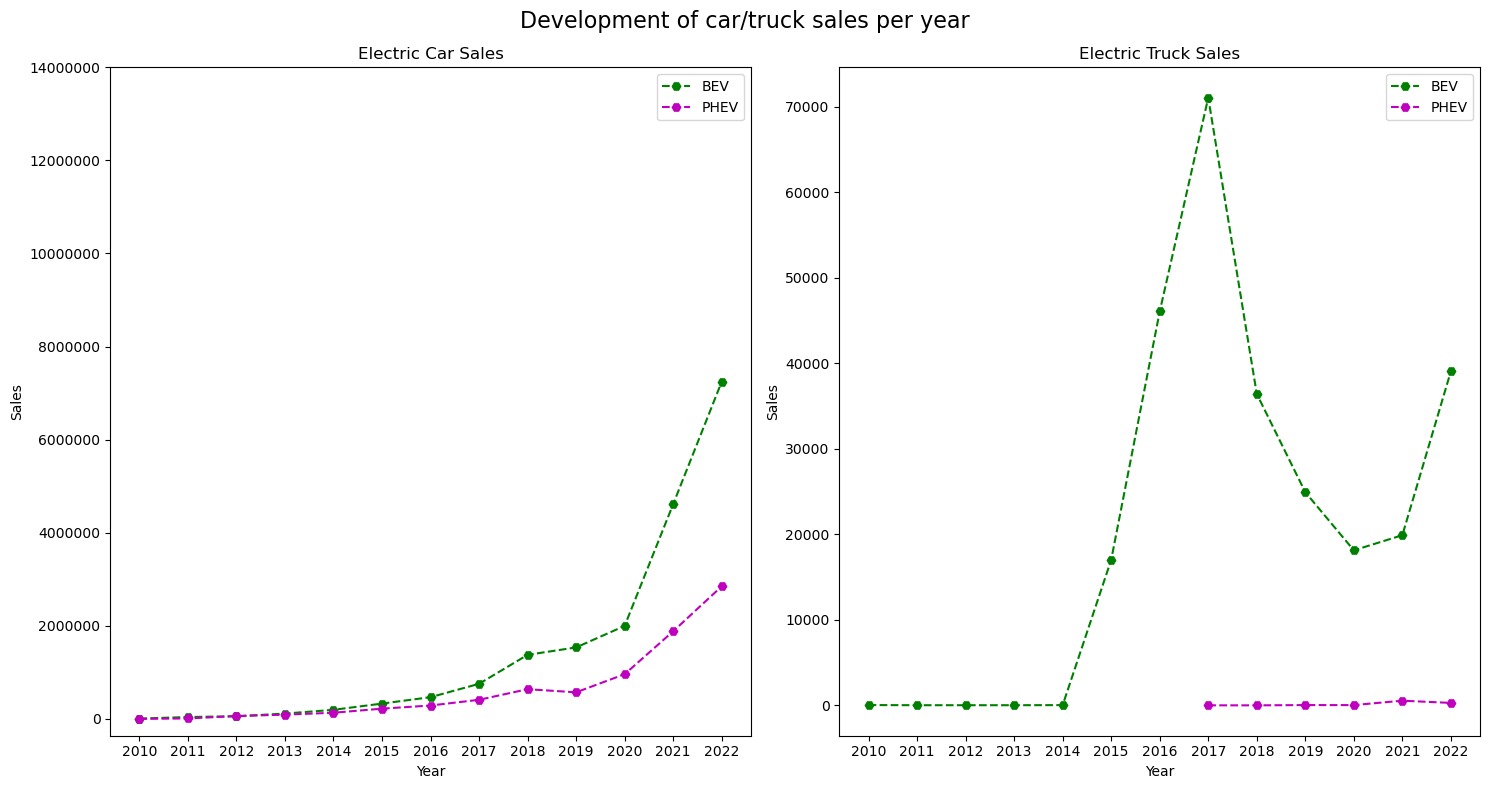

In [12]:
# Create figure

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.plot(df_grouped_total_value_cars_BEV['year'], df_grouped_total_value_cars_BEV['value'], label='BEV', marker='H', linestyle="--", color = 'g')
ax1.plot(df_grouped_total_value_cars_PHEV['year'], df_grouped_total_value_cars_PHEV['value'], label='PHEV', marker='H', linestyle="--", color = 'm')
ax1.set_title('Electric Car Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales')
ax1.set_yticks(range(0, 15000000, 2000000)) 
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_xticks(df_grouped_total_value_cars_BEV['year'])
ax1.legend()

ax2.plot(df_grouped_total_value_trucks_BEV['year'], df_grouped_total_value_trucks_BEV['value'], label='BEV', marker='H', linestyle="--", color = 'g')
ax2.plot(df_grouped_total_value_trucks_PHEV['year'], df_grouped_total_value_trucks_PHEV['value'], label='PHEV', marker='H', linestyle="--", color = 'm')
ax2.set_title('Electric Truck Sales')
ax2.set_xlabel('Year')
ax2.set_ylabel('Sales')
ax2.set_xticks(df_grouped_total_value_trucks_BEV['year'])
ax2.legend() 

plt.suptitle('Development of car/truck sales per year', fontsize=16)
plt.tight_layout()
plt.show()

*Explanation graph above:
We set the y-axis of the two graphs on purpose not the same because the trucks sales are much lower and become one straight line if we set it to the axis of the first graph. Therefore, we dicided to set two different y-axis for the graphs.*